# Проект: Исследование стартапов

### Цели и задачи проекта

**Цель проекта:** Провести исследовательский анализ данных о стартапах.   

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных.
4. Сформулировать выводы по проведённому анализу.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* degrees.csv
* education.csv
* fund.csv
* investment.csv
* people.csv



### Описание данных
1. **Таблица `acquisition`**:
Содержит информацию о покупках одними компаниями других компаний:
- `id` — идентификатор покупки.
- `acquiring_company_id` — идентификатор покупающей компании.
- `acquired_company_id` — идентификатор покупаемой компании.
- `term_code` — варианты расчёта.
- `price_amount` — сумма сделки.
- `acquired_at` — дата сделки.
2. **Таблица `company_and_rounds`**:
Содержит информацию о компаниях и раундах финансирования:
- `company ID` — идентификатор компании.
- `name` — название компании.
- `category code` — категория области деятельности компании.
- `status` — статус компании.
- `founded at` — дата инвестирования.
- `closed at` — дата закрытия компании.
- `domain` — официальный сайт компании.
- `network username` — ник компании в сети.
- `country code` — код страны компании.
- `investment rounds` — число инвестиционных раундов.
- `funding rounds` — число раундов финансирования.
- `funding total` — сумма финансирования.
- `milestones` — вехи финансирования.
- `funding round id` — идентификатор этапа финансирования.
- `company id` — идентификатор компании.
- `funded at` — дата финансирования.
- `funding round type` — тип финансирования.
- `raised amount` — сумма финансирования.
- `pre money valuation` — предварительная денежная оценка.
- `participants` — число участников.
- `is first round` — является ли раунд первым.
- `is last round` — является раунд последним.
- `milestones` — вехи финансирования.
3. **Таблица `education`**:
Содержит информацию об образовании сотрудника:
- `id` — идентификатор записи об образовании.
- `person_id` — идентификатор работника.
- `instituition` — название учебного заведения.
- `graduated_at` — дата получения образования.
4. **Таблица `people`**:
Содержит информацию о сотрудниках:
- `id` — идентификатор сотрудника.
- `first_name` — имя сотрудника.
- `last_name` — фамилия сотрудника.
- `company_id` — идентификатор компании.
- `network_username` — ник в социальных сетях.
5. **Таблица `degrees`**:
Содержит информацию о типе образования сотрудника:
- `id` — идентификатор записи.
- `object_id` — идентификатор сотрудника.
- `degree_type` — тип образования.
- `subject` — специальность.
6. **Таблица `fund`**:
Содержит информацию о фондах:
- `id` — идентификатор фонда.
- `name` — название фонда.
- `category_code` — категория области деятельности компании.
- `founded_at` — дата создания фонда.
- `domain` — сайт фонда.
- `network_username` — ник фонда в сети.
- `country_code` — код страны фонда.
- `investment_rounds` — число инвестиционных раундов.
- `invested_companies` — число профинансированных компаний.
- `milestones` — вехи финансирования.
7. **Таблица `investment`**:
Содержит информацию о раундах инвестирования:
- `id` — идентификатор этапа инвестирования.
- `funding_round_id` — идентификатор раунда инвестирования.
- `company_id` — индентификатор компании.
- `funding_round_type` — тип финансирования.
- `fund_id` — идентификатор фонда.

### 1.1. Вывод общей информации, исправление названия столбцов

In [1]:
!pip install phik

In [2]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

Загрузим все данные.

In [3]:
df_acquisition = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
df_company_and_rounds = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
df_degrees = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
df_education = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
df_fund = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
df_investment = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')
df_people = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')


Проверим названия столбцов.

In [4]:
for i in ['df_acquisition', 'df_company_and_rounds', 'df_degrees', 'df_education', 'df_fund', 'df_investment', 'df_people']:
    display(f'Названия столбцов датафрейма "{i}"')
    display(eval(i).columns.tolist())

'Названия столбцов датафрейма "df_acquisition"'

['id',
 'acquiring_company_id',
 'acquired_company_id',
 'term_code',
 'price_amount',
 'acquired_at']

'Названия столбцов датафрейма "df_company_and_rounds"'

['company  ID',
 'name',
 'category  code',
 'status',
 'founded  at',
 'closed  at',
 'domain',
 'network  username',
 'country  code',
 'investment  rounds',
 'funding  rounds',
 'funding  total',
 'milestones',
 'funding  round  id',
 'company  id',
 'funded  at',
 'funding  round  type',
 'raised  amount',
 'pre  money  valuation',
 'participants',
 'is  first  round',
 'is  last  round']

'Названия столбцов датафрейма "df_degrees"'

['id', 'object_id', 'degree_type', 'subject']

'Названия столбцов датафрейма "df_education"'

['id', 'person_id', 'instituition', 'graduated_at']

'Названия столбцов датафрейма "df_fund"'

['id',
 'name',
 'founded_at',
 'domain',
 'network_username',
 'country_code',
 'investment_rounds',
 'invested_companies',
 'milestones']

'Названия столбцов датафрейма "df_investment"'

['id', 'funding_round_id', 'company_id', 'fund_id']

'Названия столбцов датафрейма "df_people"'

['id', 'first_name', 'last_name', 'company_id', 'network_username']

Заметим, что стиль *snake_case* отсутствует только в датафрейме `df_company_and_rounds`. Приведем к нему все названия столбцов, кроме столбца `company ID`, для него заменим название на **`company_id_first`**, чтобы название не дублировало столбец `column id`:

In [5]:
df_company_and_rounds.columns =  df_company_and_rounds.columns.str.replace('  ', '_')
display(df_company_and_rounds.columns)

Index(['company_ID', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

Заменим название столбца `company_ID`:

In [6]:
df_company_and_rounds.rename(columns={'company_ID': 'company_id_first'}, inplace=True)


Выведем информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

In [7]:
for i in ['df_acquisition', 'df_company_and_rounds', 'df_degrees', 'df_education', 'df_fund', 'df_investment', 'df_people']:
    display(f'Описание датафрейма "{i}"')
    display(eval(i).info())
    display(eval(i).head())

'Описание датафрейма "df_acquisition"'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


None

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


'Описание датафрейма "df_company_and_rounds"'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_id_first     217472 non-null  float64
 1   name                 217472 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  company_id           52928 non-null   float64
 15  funded_at        

None

,company_id_first,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'Описание датафрейма "df_degrees"'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


None

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


'Описание датафрейма "df_education"'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


None

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


'Описание датафрейма "df_fund"'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


None

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


'Описание датафрейма "df_investment"'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


None

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


'Описание датафрейма "df_people"'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


None

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


Также посмотрим на наличие дубликатов в таблицах:

In [8]:
for i in ['df_acquisition', 'df_company_and_rounds', 'df_degrees', 'df_education', 'df_fund', 'df_investment', 'df_people']:
    display(f'Наличие дубликатов в датафрейме "{i}"')
    display(eval(i).duplicated().sum())

'Наличие дубликатов в датафрейме "df_acquisition"'

0

'Наличие дубликатов в датафрейме "df_company_and_rounds"'

0

'Наличие дубликатов в датафрейме "df_degrees"'

0

'Наличие дубликатов в датафрейме "df_education"'

0

'Наличие дубликатов в датафрейме "df_fund"'

0

'Наличие дубликатов в датафрейме "df_investment"'

0

'Наличие дубликатов в датафрейме "df_people"'

0

В таблице **`df_acquisition`** представлено 9 407 наблюдений. Множество пропусков находится в столбце `term_code`. Стоит также отметить, что столбцец с датой `acquired_at` представлен в типе `object`;

В таблице **`df_company_and_rounds`** представлено 217 472 наблюдения. Пропуска отсутствуют в столбцах `company_id_first`, `name`, `status`, `investment_rounds`, `funding_rounds`, `funding_total`, `milestones`. Чуть меньше половины пропусков содержится в столбце `category_code`. В остальных столбцах больше половины наблюдений являются пропусками. Стоит также отметить, что столбцах с датой `founded_at`, `funded_at` и `closed_at` представлен в типе `object`;

В таблице **`df_degrees`** представлено 109 610 наблюдений. Пропуски находятся в столбцах `degree_type` и `subject`;

В таблице **`df_education`** представлено 109 610 наблюдений. Примерно половина пропусков находится в столбце с датой `graduated_at`, который представлен в типе `object`;

В таблице **`df_fund`** представлено 11 652 наблюдения. В основном пропуски находятся в столбцах `founded_at` и `domain`, `network_username` и `country_code`. Стоит также отметить, что столбцец с датой `founded_at` представлен в типе `object`;

В таблице **`df_investment`** представлено 61 403 наблюдения без пропусков в данных, все столбцы представлены в типе `int64`;

В таблице **`df_people`** представлено 226 709 наблюдений. Множество пропусков находится в столбцах `company_id` и `network_username`.

Таким образом, данные во всех датафреймах требуют работы с пропусками, а также переводом временных данных в соответствующий тип из типа `object`. Явных дубликатов в таблицах не выявлено.

### 1.2. Смена типов и анализ пропусков


In [9]:
# Переведем все столбцы со временем к типу datetime
df_acquisition['acquired_at'] = pd.to_datetime(df_acquisition['acquired_at'], format='%Y-%m-%d')

df_company_and_rounds['founded_at'] = pd.to_datetime(df_company_and_rounds['founded_at'], format='%Y-%m-%d')
df_company_and_rounds['funded_at'] = pd.to_datetime(df_company_and_rounds['funded_at'], format='%Y-%m-%d')
df_company_and_rounds['closed_at'] = pd.to_datetime(df_company_and_rounds['closed_at'], format='%Y-%m-%d')

df_education['graduated_at'] = pd.to_datetime(df_education['graduated_at'], format='%Y-%m-%d')

df_fund['founded_at'] = pd.to_datetime(df_fund['founded_at'], format='%Y-%m-%d')

In [10]:
display('Информация о датафрейме df_acquisition')
display(df_acquisition.info())
display('Информация о датафрейме df_company_and_rounds')
display(df_company_and_rounds.info())
display('Информация о датафрейме df_education')
display(df_education.info())
display('Информация о датафрейме df_fund')
display(df_fund.info())

'Информация о датафрейме df_acquisition'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


None

'Информация о датафрейме df_company_and_rounds'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id_first     217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

None

'Информация о датафрейме df_education'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


None

'Информация о датафрейме df_fund'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11652 non-null  int64         
 1   name                11650 non-null  object        
 2   founded_at          4605 non-null   datetime64[ns]
 3   domain              7362 non-null   object        
 4   network_username    2149 non-null   object        
 5   country_code        7053 non-null   object        
 6   investment_rounds   11652 non-null  int64         
 7   invested_companies  11652 non-null  int64         
 8   milestones          11652 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 819.4+ KB


None


Оценим полноту данных — сделаем предварительный вывод, достаточно ли данных для решения задач проекта.

In [11]:
# Посчитаем долю наблюдений с пропусками во всех датафреймах
for i in ['df_acquisition', 'df_company_and_rounds', 'df_degrees', 'df_education', 'df_fund', 'df_investment', 'df_people']:
    display(f'Количество пропусков в датафрейме "{i}"')
    display(round(eval(i).isna().sum() / eval(i).shape[0] * 100,2).sort_values(ascending = False))

'Количество пропусков в датафрейме "df_acquisition"'

term_code               80.54
acquired_at              0.31
id                       0.00
acquiring_company_id     0.00
acquired_company_id      0.00
price_amount             0.00
dtype: float64

'Количество пропусков в датафрейме "df_company_and_rounds"'

closed_at              98.42
funded_at              75.81
is_last_round          75.70
is_first_round         75.70
participants           75.70
pre_money_valuation    75.70
raised_amount          75.70
funding_round_type     75.70
funding_round_id       75.70
company_id             75.70
network_username       56.13
country_code           50.13
founded_at             49.51
category_code          33.93
domain                 32.43
company_id_first        0.14
milestones              0.14
name                    0.14
funding_rounds          0.14
investment_rounds       0.14
status                  0.14
funding_total           0.14
dtype: float64

'Количество пропусков в датафрейме "df_degrees"'

subject        25.83
degree_type    10.23
id              0.00
object_id       0.00
dtype: float64

'Количество пропусков в датафрейме "df_education"'

graduated_at    47.04
instituition     0.05
id               0.00
person_id        0.00
dtype: float64

'Количество пропусков в датафрейме "df_fund"'

network_username      81.56
founded_at            60.48
country_code          39.47
domain                36.82
name                   0.02
id                     0.00
investment_rounds      0.00
invested_companies     0.00
milestones             0.00
dtype: float64

'Количество пропусков в датафрейме "df_investment"'

id                  0.0
funding_round_id    0.0
company_id          0.0
fund_id             0.0
dtype: float64

'Количество пропусков в датафрейме "df_people"'

company_id          84.73
network_username    82.86
id                   0.00
first_name           0.00
last_name            0.00
dtype: float64

Большинство столбцов в ключевой для анализа таблице `df_company_and_rounds` содержат **более 50% пропусков**. Также стоит отметить, что для 9 столбцов процент пропусков составляет ровно **75.7%**, что может указывать на ошибки в заполнении данных.
    
Однако для ответа на ключевые вопросы информации будет достаточно.

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам


In [12]:
# Установка формата отображения чисел
pd.options.display.float_format = '{:,.0f}'.format

In [13]:
df_company_and_rounds['fund_year'] = df_company_and_rounds['funded_at'].dt.year
pivot_funds = df_company_and_rounds.pivot_table(index="fund_year", values=["raised_amount", "funding_rounds"], 
                                                aggfunc= {"raised_amount" : "mean", "funding_rounds" : "sum"})

In [14]:
pivot_funds_filtered = pivot_funds[pivot_funds['funding_rounds'] > 50]

display(pivot_funds_filtered)

,funding_rounds,raised_amount
fund_year,,
"1,998",72,"5,280,655"
"1,999",268,"7,420,242"
"2,000",403,"11,485,509"
"2,001",302,"8,761,519"
"2,002",385,"7,836,196"
"2,003",569,"5,725,050"
"2,004","1,057","7,593,646"
"2,005","4,157","9,324,877"
"2,006","6,295","8,404,267"


In [15]:
pivot_funds_2 = df_company_and_rounds.pivot_table(index="fund_year", values=["raised_amount", "funding_rounds"], 
                                                  aggfunc= {"raised_amount" : "median", "funding_rounds" : "sum"})

In [16]:
pivot_funds_filtered_2 = pivot_funds_2[pivot_funds_2['funding_rounds'] > 50]

display(pivot_funds_filtered_2)

,funding_rounds,raised_amount
fund_year,,
"1,998",72,"100,000"
"1,999",268,"2,000,000"
"2,000",403,"4,200,000"
"2,001",302,"3,000,000"
"2,002",385,"4,200,000"
"2,003",569,"3,000,000"
"2,004","1,057","5,000,000"
"2,005","4,157","5,500,000"
"2,006","6,295","5,000,000"


In [17]:
df_company_and_rounds['raised_amount'].describe()

count          52,928
mean        7,946,092
std        42,168,206
min                 0
25%           246,330
50%         1,600,000
75%         6,700,000
max     3,835,050,000
Name: raised_amount, dtype: float64

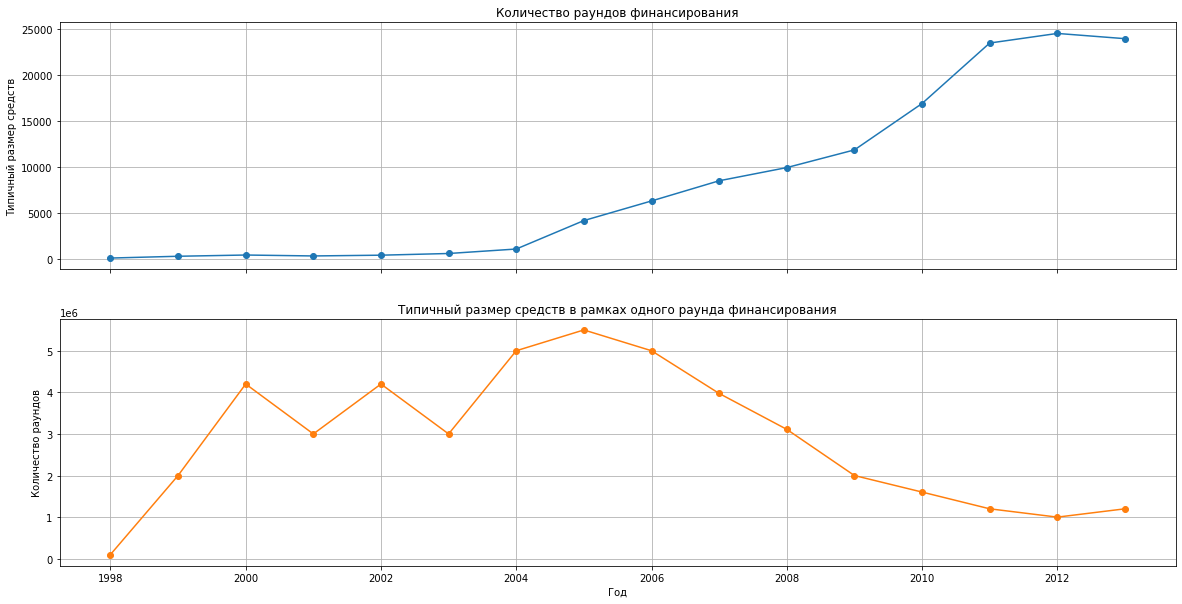

In [18]:
funds_line_plot = pivot_funds_filtered_2.plot(kind='line', subplots=True, sharex=True, sharey=False, legend=False, 
            title=['Количество раундов финансирования', 'Типичный размер средств в рамках одного раунда финансирования'], 
            marker='o', figsize=(20, 10))

funds_line_plot[0].set_ylabel('Типичный размер средств')
funds_line_plot[1].set_ylabel('Количество раундов')

funds_line_plot[0].grid(which='both')
funds_line_plot[1].grid(which='both')

plt.xlabel('Год')

plt.show()


В **2000 году** типичный размер средств в рамках одного раунда финансирования был максимальным и составлял **11 485 509** у.е.

В 2013 году общее количество раундов финансирования пошло на спад по отношению к предыдущему году, а типичный размер средств в рамках одного раунда финансирования, наоборот, стал увеличиваться и вырос примерно на 2 000 000 у.е. по отношению к предыдущему году.


    
В **2005 году** типичный размер средств в рамках одного раунда финансирования был максимальным и составлял **5 500 000** у.е.

По всему периоду можно сказать, что объем финансирования падает, а количество раундов динамично растет. Происходит большее "дробление", то есть снижение объема за счет увеличения числа раундов. В 2013 году общее количество раундов финансирования немного пошло на спад по отношению к росту в предыдущих годах, а типичный размер средств в рамках одного раунда финансирования, наоборот, стал немного увеличился по сравнению с негативным трендом предыдущих лет.


### 2.2. Люди и их образование

Заказчик хотел понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.


In [19]:
# Посмотрим на данные таблиц df_people, df_education и df_degrees
display(df_people.head(10))
display(df_education.head(10))
display(df_degrees.head(10))

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5,NaN
1,100,Peter,Lester,27,NaN
2,1000,Dr. Steven,E. Saunders,292,NaN
3,10000,Neil,Capel,"2,526",NaN
4,100000,Sue,Pilsch,NaN,NaN
5,100002,Keith,Kurzendoerfer,NaN,NaN
6,100006,Courtney,Homer,"81,558",jobsbostontech
7,100009,Eddy,Badrina,NaN,NaN
8,100010,Michael,Dadashyan,NaN,fbroulette
9,100011,Jeff,Grell,NaN,NaN


,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaT
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaT
5,6,1017,Northeastern University,1988-01-01
6,7,6176,Rochester Institute of Technology,2002-01-01
7,8,5412,University of Cambridge,2002-01-01
8,9,1243,University of Oregon,1997-01-01
9,10,6265,University of Pennsylvania,1989-01-01


,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"
5,6,p:1017,BS,Computer Science
6,7,p:6176,BS,Computer Science
7,8,p:5412,MS,Politics
8,9,p:1243,BA,International Business & Marketing
9,10,p:6265,BS,Economics


Можно заметить, что таблицу `df_degrees` возможно будет присоединить к таблице `df_education` по ключу `object_id` после того как удалим текстовую часть **р:** перед индексом сотрудника.

In [20]:
# Перед соединением данных проверим датасеты на наличие полных дубликатов
display(df_people.duplicated().sum())
display(df_education.duplicated().sum())
display(df_degrees.duplicated().sum())

0

0

0

In [21]:
# А также на наличие дубликатов по идентификаторам сотрудника
display(df_people.duplicated(subset = 'id').sum())
display(df_education.duplicated(subset = 'person_id').sum())
display(df_degrees.duplicated(subset = 'object_id').sum())

1

41159

41159

In [22]:
# Проверим 1 дубликат в таблице df_people
display(df_people[df_people.duplicated(subset = 'id', keep = False)])

,id,first_name,last_name,company_id,network_username
13171,116554,Nicole,Couto,"200,243",NaN
13172,116554,Nicole,Couto,"212,993",NaN


Все данные совпадают, кроме идентификатора компании, поэтому предположим, что сотрудник сменил компанию и данные не являются дубликатами.

In [23]:
# Проверим дубликаты в таблице df_degrees
display(df_degrees[df_degrees.duplicated(subset = 'object_id', keep = False)].head(6))

,id,object_id,degree_type,subject
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
5,6,p:1017,BS,Computer Science
6,7,p:6176,BS,Computer Science
7,8,p:5412,MS,Politics
12,13,p:2351,LLB,Law


Одинаковое количество дубликатов в таблицах `df_education` и `df_degrees` говорит о том, что в данных присутствует информация о получении различных образованиях для одного сотрудника. Соединим таблицы по идентификатору компании и еще раз проверим на наличие дубликатов:

In [24]:
# Так как необходимо разделить компании на группы, используем тип присоединения `left` 
# для того, чтобы сохранить все наблюдения о компаниях.

df_education_company = df_people.merge(df_education, left_on = 'id', right_on = 'person_id', how = 'left')

display(df_education_company.info())
df_education_company.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267694 entries, 0 to 267693
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_x              267694 non-null  int64         
 1   first_name        267689 non-null  object        
 2   last_name         267693 non-null  object        
 3   company_id        44789 non-null   float64       
 4   network_username  50775 non-null   object        
 5   id_y              109056 non-null  float64       
 6   person_id         109056 non-null  float64       
 7   instituition      109002 non-null  object        
 8   graduated_at      57691 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 20.4+ MB


None

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5,NaN,"2,415",10,Harvard University,NaT
1,100,Peter,Lester,27,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,"2,526",NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT
5,100002,Keith,Kurzendoerfer,NaN,NaN,NaN,NaN,NaN,NaT
6,100006,Courtney,Homer,"81,558",jobsbostontech,"83,604","100,006",MIT Sloan School of Management,2004-01-01
7,100009,Eddy,Badrina,NaN,NaN,NaN,NaN,NaN,NaT
8,100010,Michael,Dadashyan,NaN,fbroulette,NaN,NaN,NaN,NaT
9,100011,Jeff,Grell,NaN,NaN,NaN,NaN,NaN,NaT


In [25]:
# Для деления компаний на группы удалим пропуски в столбце company_id
df_education_company_dropped = df_education_company.dropna(subset=['company_id'])
df_education_company_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44789 entries, 0 to 267691
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_x              44789 non-null  int64         
 1   first_name        44788 non-null  object        
 2   last_name         44788 non-null  object        
 3   company_id        44789 non-null  float64       
 4   network_username  22892 non-null  object        
 5   id_y              28638 non-null  float64       
 6   person_id         28638 non-null  float64       
 7   instituition      28609 non-null  object        
 8   graduated_at      20954 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 3.4+ MB


Создадим булевую переменную по наличию информации об образовании

In [27]:
# Создадим будевую переменную, которая примет значение True, если хотя бы в одной из переменных instituition, graduated_at нет пропуска
df_education_company_final = df_education_company.copy()

condition = ~((df_education_company['instituition'].isna()) & 
              (df_education_company['graduated_at'].isna()))

# Присваиваем результат условия новому столбцу
df_education_company_final['is_inst_grad'] = condition

In [28]:
display('Результат объединения таблиц df_people и df_education:')
display('Количество данных с информацией об образовании:')
display(df_education_company_final['is_inst_grad'].sum())
display('Общее количество данных:')
display(df_education_company.shape[0])
display('Доля наблюдений с информацией об образовании:')
display (round(df_education_company_final['is_inst_grad'].sum() / df_education_company_final.shape[0], 2)) 

'Результат объединения таблиц df_people и df_education:'

'Количество данных с информацией об образовании:'

109037

'Общее количество данных:'

267694

'Доля наблюдений с информацией об образовании:'

0.41

Теперь проверим, что изменится, если к данным присоединить таблицу `df_degrees`:

In [29]:
# Создадим новый столбец с object_id без префикса "p:" и переведем новый столбец в целочисленный тип
df_degrees['id_number'] = df_degrees['object_id'].str.replace('p:', '', regex=False).astype('int64')

In [30]:
df_degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
 4   id_number    109610 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 4.2+ MB


In [31]:
# Для объединения возьмем только нужные столбцы
df_degrees_join = df_degrees[['id_number', 'degree_type', 'subject']]

In [32]:
df_degrees_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id_number    109610 non-null  int64 
 1   degree_type  98392 non-null   object
 2   subject      81298 non-null   object
dtypes: int64(1), object(2)
memory usage: 2.5+ MB


In [33]:
df_education_company_degree = df_education_company.merge(df_degrees_join, left_on = 'id_x', right_on = 'id_number', how = 'left')

display(df_education_company_degree.info())
df_education_company_degree.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370836 entries, 0 to 370835
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_x              370836 non-null  int64         
 1   first_name        370831 non-null  object        
 2   last_name         370835 non-null  object        
 3   company_id        70869 non-null   float64       
 4   network_username  81529 non-null   object        
 5   id_y              212198 non-null  float64       
 6   person_id         212198 non-null  float64       
 7   instituition      212109 non-null  object        
 8   graduated_at      113991 non-null  datetime64[ns]
 9   id_number         212198 non-null  float64       
 10  degree_type       190722 non-null  object        
 11  subject           156477 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 36.8+ MB


None

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at,id_number,degree_type,subject
0,10,Mark,Zuckerberg,5,NaN,"2,415",10,Harvard University,NaT,10,NaN,Computer Science
1,100,Peter,Lester,27,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
2,1000,Dr. Steven,E. Saunders,292,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3,10000,Neil,Capel,"2,526",NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [34]:
# Посчитаем количество наблюдений с наличием информации об образовании
df_education_company_degree_notna_count= df_education_company_degree[~((df_education_company_degree['id_y'].isna()) | 
                                                    (df_education_company_degree['instituition'].isna()) | 
                                                    (df_education_company_degree['graduated_at'].isna()) |
                                                    (df_education_company_degree['degree_type'].isna()) |
                                                    (df_education_company_degree['subject'].isna())
                                                   )].shape[0]

Создадим булевую переменную по наличию информации об образовании

In [35]:
# Создадим будевую переменную, которая примет значение True, если хотя бы в одной из переменных instituition, graduated_at
# degree_type, subject нет пропуска
df_education_company_degree_final = df_education_company_degree.copy()

condition_2 = ~((df_education_company['instituition'].isna()) & 
                (df_education_company['graduated_at'].isna()) &
                (df_education_company_degree['degree_type'].isna()) &
                (df_education_company_degree['subject'].isna()))

df_education_company_degree_final['is_inst_grad_degr_sub'] = condition_2

In [36]:
display('Результат объединения таблиц df_people, df_education и df_degrees:')
display('Количество данных с информацией об образовании:')
display(df_education_company_degree_final['is_inst_grad_degr_sub'].sum())
display('Общее количество данных:')
display(df_education_company_degree_final.shape[0])
display('Доля наблюдений с информацией об образовании:')
display (round(df_education_company_degree_final['is_inst_grad_degr_sub'].sum() / df_education_company_degree_final.shape[0], 2))

'Результат объединения таблиц df_people, df_education и df_degrees:'

'Количество данных с информацией об образовании:'

300974

'Общее количество данных:'

370836

'Доля наблюдений с информацией об образовании:'

0.81

При присоединении таблицы `df_degrees` доля наблюдений с наличием информации об образовании возрасла с 41 до 81%, поэтому для ответа на поставленный вопрос используем новый датасет `df_education_company_degree`

In [37]:
# Для деления компаний на группы удалим пропуски в столбце company_id
df_education_company_degree_final_drop = df_education_company_degree_final.dropna(subset=['company_id'])
df_education_company_degree_final_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70869 entries, 0 to 370833
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_x                   70869 non-null  int64         
 1   first_name             70868 non-null  object        
 2   last_name              70868 non-null  object        
 3   company_id             70869 non-null  float64       
 4   network_username       37404 non-null  object        
 5   id_y                   54718 non-null  float64       
 6   person_id              54718 non-null  float64       
 7   instituition           54670 non-null  object        
 8   graduated_at           40052 non-null  datetime64[ns]
 9   id_number              54718 non-null  float64       
 10  degree_type            48951 non-null  object        
 11  subject                44165 non-null  object        
 12  is_inst_grad_degr_sub  70869 non-null  bool          
dtype

In [38]:
# Так как нам нужна информация о количестве уникальных сотрудников в компании и наличия у них хотя бы одного образования,
# проверим встречаются ли в данных дубликаты по двум столбцам
display(df_education_company_degree_final_drop.duplicated(subset = ['id_x', 'company_id']).sum())

36254

In [39]:
# Удалим найденные дубликаты
df_education_company_degree_cleaned = df_education_company_degree_final_drop.drop_duplicates(subset= ['id_x', 'company_id'], 
                                                                            keep='first', inplace=False)

In [42]:
# Для каждой компании посчитаем количество сотрудников (id_x) и количество записей об образовании (is_inst_grad_degr_sub)
education_grouped_2 = df_education_company_degree_cleaned.groupby('company_id').agg({'id_x': 'count', 'is_inst_grad_degr_sub': 'sum'}).reset_index()
display(education_grouped_2.head(20))

,company_id,id_x,is_inst_grad_degr_sub
0,1,2,1
1,2,1,1
2,3,3,3
3,4,13,13
4,5,61,59
5,8,3,3
6,9,1,1
7,10,2,2
8,11,5,4
9,12,51,43


In [43]:
# Посчитаем долю сотрудников с отсутствием информации об образовании для каждой компании
education_grouped_2['education_share'] = round(1 - (education_grouped_2['is_inst_grad_degr_sub'] / education_grouped_2['id_x']), 2)

In [44]:
# Проверим как распределены данные по количеству сотрудников
education_grouped_2['id_x'].describe()

count   22,922
mean         2
std          3
min          1
25%          1
50%          1
75%          1
max        244
Name: id_x, dtype: float64

Так как в среднем для компаний в данных содержится информация о 2 сотрудниках и 75% данных компаний содержат информацию об одном сотруднике, более подробно разобъем значения количества сотрудников близкие к 1:
- 1 группа **1-2** сотрудника
- 2 группа **3-5** сотрудников
- 3 группа **5-10** сотрудников
- 4 группа **больше 10** сотрудников

In [45]:
education_grouped_2['employee'] = pd.cut(education_grouped_2['id_x'], bins=[0, 2, 5, 10, 245], 
                                       labels=["1-2 сотрудника", "3-5 сотрудников", "5-10 сотрудников", "больше 10 сотрудников"],
                                      right = True)

education_grouped_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22922 entries, 0 to 22921
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   company_id             22922 non-null  float64 
 1   id_x                   22922 non-null  int64   
 2   is_inst_grad_degr_sub  22922 non-null  int64   
 3   education_share        22922 non-null  float64 
 4   employee               22922 non-null  category
dtypes: category(1), float64(2), int64(2)
memory usage: 739.0 KB


In [46]:
# Подсчитаем количество сотрудников в каждой группе и среднюю долю сотрудников без информации об образовании
emploee_grouped = education_grouped_2.groupby('employee').agg({'id_x': 'sum', 'education_share': 'mean'}).sort_values(by = 'education_share', ascending = False)
display(emploee_grouped.style.format("{:.2f}"))

,id_x,education_share
employee,,
1-2 сотрудника,23535.00,0.18
больше 10 сотрудников,2668.00,0.16
5-10 сотрудников,2664.00,0.16
3-5 сотрудников,5748.00,0.16


Самая большая доля сотрудников без образования находится в группе `1-2 сотрудника` и составляет **18%**. В остальных категориях -**16%**.

### Установим, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Необходимо понять, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.



In [47]:
for i in ['df_company_and_rounds', 'df_people', 'df_fund']:
    display(f'Количество дубликатов в таблице {i}:')
    display(eval(i).duplicated(subset = 'network_username').sum())
    display(f'Процент дубликатов в таблице {i}:')
    display(round(eval(i).duplicated(subset = 'network_username').sum() / eval(i).shape[0], 2))
    display(f'Процент пропусков в таблице {i}:')
    display(round(eval(i)['network_username'].isna().sum() / eval(i).shape[0], 2))

'Количество дубликатов в таблице df_company_and_rounds:'

138202

'Процент дубликатов в таблице df_company_and_rounds:'

0.63

'Процент пропусков в таблице df_company_and_rounds:'

0.56

'Количество дубликатов в таблице df_people:'

188287

'Процент дубликатов в таблице df_people:'

0.83

'Процент пропусков в таблице df_people:'

0.83

'Количество дубликатов в таблице df_fund:'

9553

'Процент дубликатов в таблице df_fund:'

0.82

'Процент пропусков в таблице df_fund:'

0.82

Заметим, что в таблицах `df_people` и `df_fund` процент пропусков и процент дубликатов одинаковый, что может означать, что одно и является другим.

In [48]:
# Избавимся от пропусков и проведем проверку еще раз
df_company_and_rounds_not_na = df_company_and_rounds.dropna(subset=['network_username'])
df_people_not_na = df_people.dropna(subset=['network_username'])
df_fund_not_na = df_fund.dropna(subset=['network_username'])

In [49]:
for i in ['df_company_and_rounds_not_na', 'df_people_not_na', 'df_fund_not_na']:
    display(f'Количество дубликатов в таблице {i}:')
    display(eval(i).duplicated(subset = 'network_username').sum())
    display(f'Процент дубликатов в таблице {i}:')
    display(round(eval(i).duplicated(subset = 'network_username').sum() / eval(i).shape[0], 2))

'Количество дубликатов в таблице df_company_and_rounds_not_na:'

15963

'Процент дубликатов в таблице df_company_and_rounds_not_na:'

0.17

'Количество дубликатов в таблице df_people_not_na:'

446

'Процент дубликатов в таблице df_people_not_na:'

0.01

'Количество дубликатов в таблице df_fund_not_na:'

51

'Процент дубликатов в таблице df_fund_not_na:'

0.02

In [50]:
# Приведем все никнеймы к строчному написанию
for i in ['df_company_and_rounds_not_na', 'df_people_not_na', 'df_fund_not_na']:
    eval(i)['network_username'] = eval(i)['network_username'].str.lower()

for i in ['df_company_and_rounds_not_na', 'df_people_not_na', 'df_fund_not_na']:
    display(f'Количество дубликатов в таблице {i}:')
    display(eval(i).duplicated(subset = 'network_username').sum())
    display(f'Процент дубликатов в таблице {i}:')
    display(round(eval(i).duplicated(subset = 'network_username').sum() / eval(i).shape[0], 2))

/tmp/ipykernel_220/1593127511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval(i)['network_username'] = eval(i)['network_username'].str.lower()


'Количество дубликатов в таблице df_company_and_rounds_not_na:'

16160

'Процент дубликатов в таблице df_company_and_rounds_not_na:'

0.17

'Количество дубликатов в таблице df_people_not_na:'

483

'Процент дубликатов в таблице df_people_not_na:'

0.01

'Количество дубликатов в таблице df_fund_not_na:'

58

'Процент дубликатов в таблице df_fund_not_na:'

0.03

Таким образом, в отчищенных от пропусков данных в столбце `network_username`:
- в таблице `df_company_and_rounds` **17%** данных являются **дубликатами**, при том что изначальная таблица содержит **56% попусков**;
- в таблице `df_people` **1%** данных является **дубликатами**, при том что изначальная таблица содержит **83% попусков**;
- в таблице `df_fund` **2%** данных являются **дубликатами**, при том что изначальная таблица содержит **82% попусков**;

Можно сделать вывод, что столбец `network_username` не подходит для присоединения таблиц друг с другом.

Найдем пересечения по столбцу `network_username` в  таблицах `df_company_and_rounds`, `df_people`, `df_fund`:

In [51]:
# Найдем пересечения трех таблиц
intersection = set(df_company_and_rounds['network_username']).intersection(set(df_people['network_username'])).intersection(
    set(df_fund['network_username']))

intersection_list = list(intersection)

In [52]:
# Выведем количество пересечений
display(len(intersection_list))

8

В итоге по столбцу `network_username` среди трех таблиц найдено всего 8 пересечений, что говорит о том, что данная переменная не подходит для объединения данных.

Также посчитаем пересечения по парам:

In [53]:
# Найдем пересечения таблиц df_company_and_rounds и df_people
intersection_company_people = set(df_company_and_rounds['network_username']).intersection(set(df_people['network_username']))

intersection_list_company_people = list(intersection_company_people)

In [54]:
display(len(intersection_list_company_people))

2200

In [55]:
# Найдем пересечения таблиц df_company_and_rounds и df_fund
intersection_company_fund = set(df_company_and_rounds['network_username']).intersection(set(df_fund['network_username']))

intersection_list_company_fund = list(intersection_company_fund)

In [56]:
display(len(intersection_list_company_fund))

71

In [57]:
# Найдем пересечения таблиц df_people и df_fund
intersection_people_fund = set(df_people['network_username']).intersection(set(df_fund['network_username']))

intersection_list_people_fund = list(intersection_people_fund)

In [58]:
display(len(intersection_list_people_fund))

80

Максимальное количество пересечений (2 200) наблюдается между таблицами `df_company_and_rounds` и `df_people`.


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Хотя информация об общем объёме финансирования по раундам присутствует в других датасетах, заказчик считает данные `company_and_rounds.csv` о размере средств наиболее верными.

* Приведем данные в вид, который позволяет проводить анализ в разрезе отдельных компаний.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

* Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовим данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию.

In [59]:
display(df_company_and_rounds.head(10))

,company_id_first,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,fund_year
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,888,1,2005-10-01,series-a,"5,250,000",0,2,0,1,"2,005"
1,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,889,1,2007-01-01,series-b,"9,500,000",0,3,0,0,"2,007"
2,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,"2,312",1,2008-05-19,series-c+,"25,000,000",0,4,1,0,"2,008"
3,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"10,000",MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"10,001",THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"10,002",Synergie Media,advertising,operating,2007-06-27,NaT,synergie-media.com,NaN,MAR,0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"10,003",Green Basti Ecosystems,cleantech,operating,2008-08-20,NaT,NaN,NaN,IND,0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"100,042",HostNine,NaN,operating,NaT,NaT,hostnine.com,Hostnine,NaN,0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Сразу же заметим, что первые три наблюдения похожи на дубликаты. Информация о самой компании с `company_id_first` = **1** идентична для трех строк. Различия можно заметить в информации об инвестиционных раундах. В таблице присутствует идентичный столбцу `company_id_first` столбец `company_id`. Проверим часть данных с отсутствием пропусков в `company_id`.

In [60]:
df_company_and_rounds[df_company_and_rounds['company_id'].notna()].head(20)

,company_id_first,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,fund_year
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,888,1,2005-10-01,series-a,"5,250,000",0,2,0,1,"2,005"
1,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,889,1,2007-01-01,series-b,"9,500,000",0,3,0,0,"2,007"
2,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,...,"2,312",1,2008-05-19,series-c+,"25,000,000",0,4,1,0,"2,008"
15,"1,001",FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0,...,"1,644","1,001",2008-02-26,series-a,"5,000,000",0,3,1,1,"2,008"
20,"10,014",Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0,...,"6,682","10,014",2008-09-01,angel,0,0,1,1,1,"2,008"
21,"10,015",Fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,USA,0,...,"3,619","10,015",2008-10-10,series-a,"2,000,000",0,2,0,1,"2,008"
22,"10,015",Fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,USA,0,...,"18,213","10,015",2010-09-10,series-b,"9,000,000",0,4,0,0,"2,010"
23,"10,015",Fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,USA,0,...,"27,747","10,015",2012-01-24,series-c+,"12,000,000",0,4,0,0,"2,012"
24,"10,015",Fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,USA,0,...,"45,409","10,015",2013-08-13,series-c+,"43,000,000",0,5,1,0,"2,013"
25,"10,015",Fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,USA,0,...,"54,006","10,015",2012-01-01,venture,"2,069,200",0,4,0,0,"2,012"


И правда в данных присутствует множество дубликатов компаний, однако информация об инвестиционных раундах для каждого наблюдения внутри одной компании различается. Вероятнее всего наличие дубликатов в таблице `df_company_and_rounds` было вызвано неправильным присоединением таблиц с информацией о компании и с информацией об инвестиционных раундов для компаний. Чтобы привести данные в подходящий для анализа вид, разделим таблицу на две части.

In [61]:
# Создадим таблицу с информацией о компаниях и сразу же удалим из него дубликаты, оставляя первые упоминания о компаниях
df_company_info = df_company_and_rounds[['company_id_first', 'name', 'category_code', 'status', 'founded_at', 'closed_at', 'domain',
                                        'network_username', 'country_code', 'investment_rounds',
                                        'funding_rounds', 'funding_total', 'milestones'
                                        ]].drop_duplicates(keep='first', inplace=False)

In [62]:
# Проверим наличие пропусков в company_id_first
df_company_info[df_company_info['company_id_first'].isna()]

,company_id_first,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
217472,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# Проверим наличие дубликатов по идентификатору в новой таблице
display('Найдено дубликатов:')
display(df_company_info.duplicated(subset = 'company_id_first').sum())

display(df_company_info.info())

'Найдено дубликатов:'

0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196554 entries, 0 to 217472
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id_first   196553 non-null  float64       
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


None

In [64]:
# В одном наблюдении отсутствует вся информация, поэтому удалим его из таблицы
df_company_info_cleaned = df_company_info.dropna(subset = ['company_id_first'])

In [65]:
# Переведем столбец company_id_first к типу "int"
df_company_info_final = df_company_info_cleaned.copy()
df_company_info_final['company_id_first'] = pd.to_numeric(df_company_info_final['company_id_first'], downcast='integer')
display(df_company_info_final['company_id_first'].dtypes)

dtype('int32')

In [66]:
df_company_and_rounds.columns

Index(['company_id_first', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round', 'fund_year'],
      dtype='object')

Теперь соберем таблицу с информацией об инвестиционных раундах:

In [67]:
# Так как единственное что может связывать информацию об инвестиционных райндах и информацию о компании - это столбец company_id,
# сразу удалим наблюдения с пропусками в этом столбце
df_invest = df_company_and_rounds[['company_id', 'funding_round_id', 'funded_at', 'funding_round_type', 'raised_amount', 
                                   'pre_money_valuation', 'participants', 'is_first_round', 'is_last_round', 'fund_year'
                                  ]].dropna(subset = ['company_id'])
df_invest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52928 entries, 0 to 217773
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company_id           52928 non-null  float64       
 1   funding_round_id     52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
 9   fund_year            52680 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 4.4+ MB


In [68]:
# Проверим наличие явных дубликатов
df_invest.duplicated().sum()

0

In [69]:
# Переведем столбец company_id к типу "int"
df_invest_final = df_invest.copy()
df_invest_final['company_id'] = pd.to_numeric(df_invest_final['company_id'], downcast='integer')
display(df_invest_final['company_id'].dtypes)

dtype('int32')

In [70]:
display('Количество уникальных компанией с информацией об инвестиционных раундах:')
df_invest_final['company_id'].nunique()

'Количество уникальных компанией с информацией об инвестиционных раундах:'

31939

In [71]:
display('Процент компаний с наличием информации об инвестиционных раундах:')
round(df_invest_final['company_id'].nunique() / df_company_info_final.shape[0] * 100, 2)

'Процент компаний с наличием информации об инвестиционных раундах:'

16.25

Таким образом, изначальный датасет `df_company_and_rounds` был разделен на две таблицы:
1. Таблица **`df_company_info_final`** c описательной информацией о **196 553 компаниях**;
2. Таблица **`df_invest_final`** с информацией об инвестиционных раундах для **31 939**, всего в таблице **52 928 наблюдений**.

Информация об инвестиционных раундах в таблице `df_invest_final` содержится для **16.25%** компаний из таблицы `df_company_info_final`.


## Шаг 3. Исследовательский анализ объединённых таблиц




### 3.1. Объединение данных

Объединим данные для ответа на вопросы заказчика, которые касаются интересующих его компаний.

В качестве основы для объединённой таблицы возьмем данные из обработанного датасета `company_and_rounds.csv` — выберем только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, и те, у которых в колонке `status` указано `acquired`.


In [72]:
df_company_filtered = df_company_info_final[(df_company_info_final['funding_rounds'] > 0) | 
                                            (df_company_info_final['investment_rounds'] > 0) |
                                            (df_company_info_final['status'] == 'acquired')]

In [73]:
df_company_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id_first   40747 non-null  int32         
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  float64       
 10  funding_rounds     40747 non-null  float64       
 11  funding_total      40747 non-null  float64       
 12  milestones         40747 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int32(1), object(6)
memory


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.


In [74]:
df_company_filtered['funding_total'].describe()

count          40,747
mean       10,135,610
std        56,464,360
min                 0
25%                 0
50%           600,000
75%         5,650,650
max     5,700,000,000
Name: funding_total, dtype: float64

Сразу же можно отметить, что распределение данных не похоже на нормальное. Среднее значение значительно отличается от медианного, при том что 75% данных в столбце меньше его среднего значения, что говорит о том, что в выборке присутствуют аномально большие выбросы (также это заметно по максимальному значению), которые искусственно смещают показатель среднего в большую сторону. Также стоит обратить внимание на большое стандартное отклонение.

In [75]:
# Определим пороги для выбросов с помощью межквартильного размаха IQR
Q1 = df_company_filtered['funding_total'].quantile(0.25)

Q3 = df_company_filtered['funding_total'].quantile(0.75)

# Вычисляем IQR
IQR = Q3 - Q1

# Определим порог для верхних выбросов

upper_bound = Q3 + 1.5*IQR

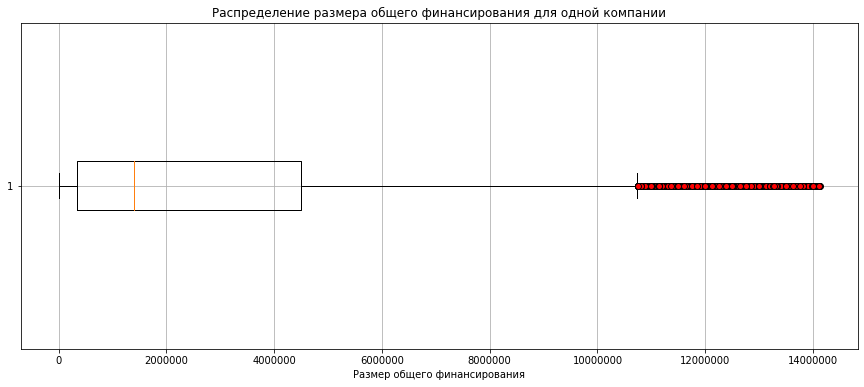

In [76]:
plt.figure(figsize=(15, 6))

plt.boxplot(df_company_filtered[(df_company_filtered['funding_total'] > 0) & 
                                (df_company_filtered['funding_total'] < upper_bound)]['funding_total'],
vert=False,
flierprops=dict(markerfacecolor='r', marker='o'))
plt.title('Распределение размера общего финансирования для одной компании')
plt.xlabel('Размер общего финансирования')
plt.grid(True)

plt.ticklabel_format(style='plain', axis='x')

plt.show()

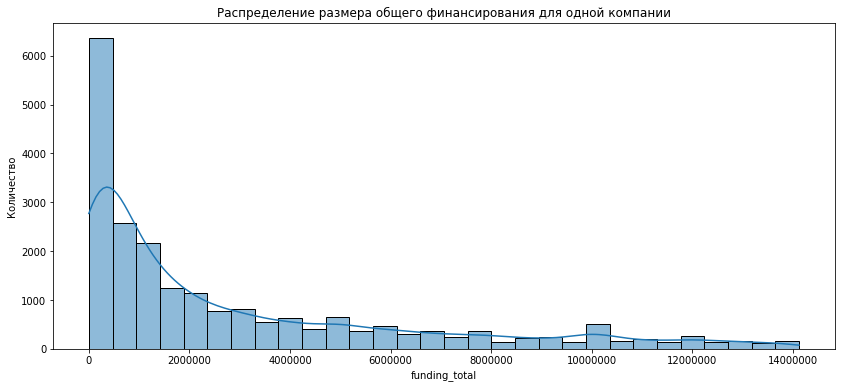

In [77]:
plt.figure(figsize=(14, 6))
    
sns.histplot(data=df_company_filtered[(df_company_filtered['funding_total'] > 0) & 
                                     (df_company_filtered['funding_total'] < upper_bound)], x='funding_total', 
                                     bins = 30, kde = True)
plt.title('Распределение размера общего финансирования для одной компании')
plt.ylabel('Количество')
plt.ticklabel_format(style='plain', axis='x')
    
plt.show()

In [78]:
df_company_filtered[(df_company_filtered['funding_total'] > 0) & 
                                     (df_company_filtered['funding_total'] < upper_bound)]['funding_total'].value_counts().head(15)

1,000,000     698
500,000       523
100,000       480
2,000,000     455
5,000,000     378
10,000,000    374
50,000        369
3,000,000     350
250,000       349
1,500,000     348
4,000,000     259
200,000       258
150,000       249
25,000        248
6,000,000     239
Name: funding_total, dtype: int64

Подавляющее большинство данных находится в отметке **0**, которая является 1 квартилем. Если рассматривать распределение без учета нулевых значений, то большинство все равно близко к нулю и находится до 2 000 000 у.е.

In [79]:
# Посчитаем мединану без учета нулей и больших выбросов
funding_total_median = df_company_filtered[(df_company_filtered['funding_total'] > 0) & 
                   (df_company_filtered['funding_total'] < upper_bound)]['funding_total'].quantile(0.5)
display(funding_total_median)

# Выведем правую границу выбросов
display(upper_bound)

1400000.0

14126625.0

Таким образом, типичным значением размера общего финансирования для одной компании без учета нулей и больших выбросов можно назвать **1 400 000** у.е. А выбивающимися будут значения от **14 126 625** у.е.


### 3.3. Исследуем компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.


In [82]:
df_acquisition_free = df_acquisition[(df_acquisition['price_amount'] == 0) | (df_acquisition['price_amount'] == 1)]

In [83]:
df_company_free = df_company_filtered[(df_company_filtered['company_id_first'].isin(df_acquisition_free['acquired_company_id'].unique())) &
                                      (df_company_filtered['status'] == 'acquired') &
                                      (df_company_filtered['funding_total'] > 0)]

In [84]:
df_company_free['funding_total'].describe()

count           1,593
mean       17,989,939
std       145,312,236
min             3,750
25%         2,000,000
50%         6,000,000
75%        15,400,000
max     5,700,000,000
Name: funding_total, dtype: float64

In [85]:
Q1_free = df_company_free['funding_total'].quantile(0.25)

Q3_free = df_company_free['funding_total'].quantile(0.75)

# Вычисляем IQR
IQR_free = Q3_free - Q1_free

# Определим порог для выбросов
lowwer_bound_free = Q1_free - 1.5*IQR_free
upper_bound_free = Q3_free + 1.5*IQR_free

In [86]:
display(lowwer_bound_free)
display(upper_bound_free)

-18100000.0

35500000.0

In [87]:
df_company_free['funding_total'].quantile(0.91)

35108000.00000001

Правая граница интервала выбросов соответствует примерно 91 процентилю, нижняя граница получилась отрицательная из-за большого значения межквартильного размаха. Ввиду большого количества аномально больших значений и сосредоточения основной массы данных в левой части имеет смысл использовать только правую границу выбросов.

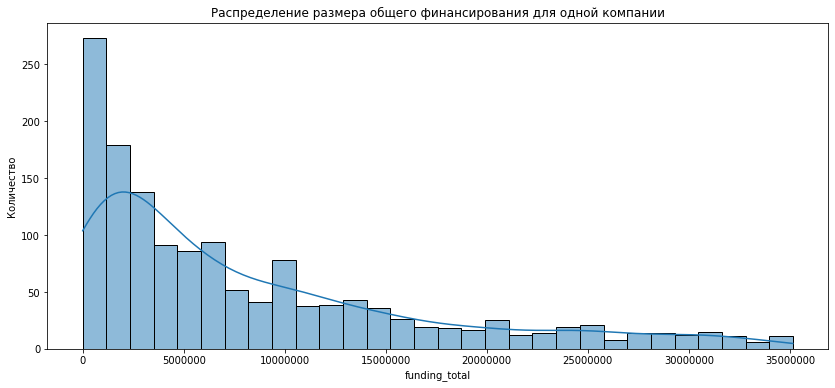

In [88]:
plt.figure(figsize=(14, 6))
    
sns.histplot(data=df_company_free[df_company_free['funding_total'] < upper_bound_free], x='funding_total', bins = 30, kde = True)
plt.title('Распределение размера общего финансирования для одной компании')
plt.ylabel('Количество')
plt.ticklabel_format(style='plain', axis='x')
    
plt.show()

In [89]:
df_company_free[df_company_free['funding_total'] < upper_bound_free]['funding_total'].describe()

count        1,450
mean     8,309,399
std      8,527,973
min          3,750
25%      1,775,000
50%      5,101,705
75%     12,000,000
max     35,150,000
Name: funding_total, dtype: float64

Стоит отметить, что даже при отсечении выбросов с помощью рассчитанного значения интервала выбросов график распределения значений смещен влево с длинным правым хвостом аномально больших значений. Поэтому для более точного анализа типичного размера финансирования компании лучше использовать меньший процентиль.


### 3.4. Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделим категории стартапов, характеризующиеся:

* наибольшими ценами;
* и наибольшим разбросом цен за стартап.


In [90]:
df_company_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id_first   40747 non-null  int32         
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  float64       
 10  funding_rounds     40747 non-null  float64       
 11  funding_total      40747 non-null  float64       
 12  milestones         40747 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int32(1), object(6)
memory

In [91]:
# Поставим значение-индикатор вместо пропусков в столбце с категорией
df_company_category = df_company_filtered.copy()
df_company_category['category_code'] = df_company_category['category_code'].fillna('no_info')

Так как в данных присутствуют большие выбросы для вычисления типичного значения подсчитаем медиану, а ткже стандартное отклонение и количество наблюдений в разрезе категорий:

In [92]:
df_company_category_grouped = df_company_category.groupby('category_code')['funding_total'].agg(
    ['median', 'std', 'count']).sort_values(by = 'std', ascending = False)

In [93]:
df_company_category_grouped.head(15)

,median,std,count
category_code,,,
automotive,"1,300,000","183,204,652",89
mobile,"800,000","145,979,244",2359
social,"355,000","111,475,778",614
health,"1,000,000","105,034,086",650
nanotech,"5,115,960","95,961,092",60
manufacturing,"1,895,040","93,045,301",394
cleantech,"6,000,000","92,155,505",1145
network_hosting,"2,000,000","62,888,384",634
public_relations,"450,000","58,402,710",591


Самые большие стандартные отклонения заметны у первых семи категорий, поэтому оставим ТОП-7 категорий:

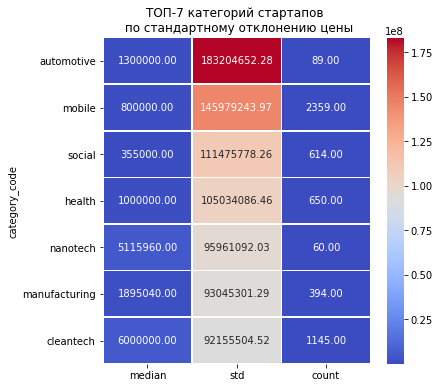

In [94]:
plt.figure(figsize=(6, 6))

sns.heatmap(data=df_company_category_grouped.head(7), annot=True, fmt='.2f', linewidths=0.5, cmap='coolwarm')
plt.title('ТОП-7 категорий стартапов \n по стандартному отклонению цены')

plt.show()

Самое большое стандартное отклонение присутствует в категории `automotive`. В этой категории цены стартапов могут отличаться от среднего значения на **183 млн** у.е., что может говорить о потенциально большом выйгрыше для инвестора.

На втором месте категория `mobile` со стандартным отклонением в **146 млн** у.е.

На последнем месте в ТОП-7 категория `cleantech` со стандартным отклонением в **92 млн** у.е.

В категориях, не входящих в ТОП-7 стандартное отклонение не превышает **63 млн** у.е.

Также проанализируем значения по медианной сумме:

In [95]:
df_company_category_grouped_median = df_company_category.groupby('category_code')['funding_total'].agg(
    ['median', 'std', 'count']).sort_values(by = 'median', ascending = False)

In [96]:
df_company_category_grouped_median.head(15)

,median,std,count
category_code,,,
semiconductor,"8,100,000","39,924,605",551
cleantech,"6,000,000","92,155,505",1145
medical,"5,400,000","33,549,833",703
nanotech,"5,115,960","95,961,092",60
biotech,"4,000,000","54,657,913",3597
security,"2,024,640","44,979,657",495
analytics,"2,000,000","28,934,650",701
network_hosting,"2,000,000","62,888,384",634
manufacturing,"1,895,040","93,045,301",394


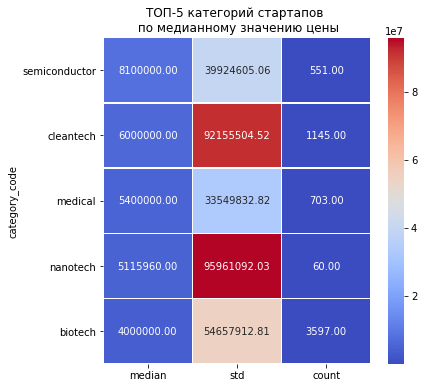

In [97]:
plt.figure(figsize=(6, 6))

sns.heatmap(data=df_company_category_grouped_median.head(5), annot=True, fmt='.2f', linewidths=0.5, cmap='coolwarm')
plt.title('ТОП-5 категорий стартапов \n по медианному значению цены')

plt.show()

По медианному значению можно выделить ТОП-5 категорий с наибольшими ценами от **4 000 000 до 8 100 000** В остальных категориях медианная цена не превышает **2 млн у.е.**. Лидером по цене стала категория `semiconductor`. Однако стоит отметить, что самыми большими стандартными отклонениями **(около 94 млн у.е.)** в ТОП-5 выделяются категории `cleantech` и `nanotech`.


### 3.5. Сколько раундов продержится стартап перед покупкой

* Проанализируем столбец `funding_rounds`. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.


In [98]:
df_company_info_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196553 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id_first   196553 non-null  int32         
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int32(1), 

In [99]:
# Рассмотрим как распределены значения в столбце funding_rounds
df_company_info_final['funding_rounds'].describe()

count   196,553
mean          0
std           1
min           0
25%           0
50%           0
75%           0
max          15
Name: funding_rounds, dtype: float64

In [100]:
df_company_info_final['funding_rounds'].quantile(0.80)

0.0

Около 80% значений в столбце равняются нулю, для более коректного анализа рассмотрим типичные значения без учета нулевых значений:

In [101]:
df_company_status = df_company_info_final[df_company_info_final['funding_rounds'] != 0].groupby('status')['funding_rounds'].agg(
    ['mean', 'min', 'max', 'count']).sort_values(by = 'mean', ascending = False)

In [102]:
df_company_status

,mean,min,max,count
status,,,,
ipo,3,1,13,490
acquired,2,1,12,2593
operating,2,1,15,26535
closed,1,1,8,2089


В среднем больше всего раундов **(3)** характерно для статуса `ipo`. Для статуса `closed` характерен в среднем **1** раунд. А для категорий `acquired` и `operating` по **2** раунда. Минимальное значение для каждого статуса без учета нулевых значений это **1**. В то время как самым большим максимальным количеством раундовотличается статус `operating` - **15** раундов, а наименьшим - статус `closed` с **8** раундами.

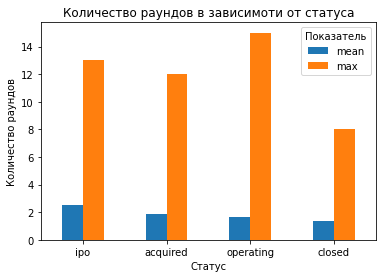

In [103]:
df_company_status.reset_index().plot(kind='bar', x='status', y=['mean', 'max'])

plt.xlabel('Статус')
plt.ylabel('Количество раундов')
plt.title('Количество раундов в зависимоти от статуса')
plt.xticks(rotation=0)
plt.legend(title='Показатель')

plt.show()


## Шаг 4. Итоговый вывод и рекомендации



**1. Общий обзор работы**
В ходе проведенного исследования была проанализирована информация о компаниях стартапах. Детально была рассмотрена информация о раундах финансирования компаний, а также информация о сотрудниках компании и их образования.

**На первом этапе работы** удалось провести предобработку данных. 
- Временные данные были переведены в соответствующий формат для анализа.
- Таблица `company and rounds` была разделена на две самоостоятельные таблицы ввиду ошибки хранения данных.
- Были созданы значения-индикаторы для более качественного анализа.

**На втором этапе работы** был проведен исследовательский анализ данных, который включал в себя:
   - анализ типичного количества раундов финансирования по годам;
   - анализ доли компаний с наличием информации об образовании сотрудников;
   - анализ выбросов размера финансирования для приобретенных компаний;
   - анализ компаний проданных бесплатно;
   - анализ цен компаний в разрезе категорий деятельности;
   - анализ количества раундов в зависимости от статуса компании.

**2. Ответы на исследовательские вопросы**

- **Количество раундов финансирования по годам**. В **2005 году** типичный размер средств в рамках одного раунда финансирования был максимальным и составлял **5 500 000** у.е. По всему периоду можно отметить динамичное снижение объема за счет увеличения числа раундов. 
- **Доля компаний с наличием информации об образовании сотрудников**. В основном для компаний типично наличие информации об одном сотруднике. Самая большая доля сотрудников без наличия информации об образовании находится в компаниях с `1-2 сотрудниками` и составляет **18%**. В остальных категориях **16%**.
- **Выбросы размера финансирования для приобретенных компаний**. Большое количество значений находится в отметке **0**. Аномально большими значениями можно считать значения от **14 126 625** у.е. А типичным значением размера общего финансирования для одной компании без учета нулей и больших выбросов можно назвать **1 400 000** у.е.
- **Компании, проданные бесплатно**. Для компаний, проданных за 1 или 0 у.е., граница выбросов выше и составляет около **35 000 000** у.е. по рассчетным значениям. Типичное значение финасирования также выше чем у полной выборки и составляет **3 000 000** у.е.
- **Цены компаний в разрезе категорий деятельности**. Был выделен ТОП-7 категорий по размеру стандартного отклонения цены. Лидером стала категория `automotive` с отклонением около **183 000 000** у.е. На втором месте категория `mobile` со стандартным отклонением в **146 000 000** у.е. На последнем `cleantech` - **92 000 000** у.е.
- **Количество раундов в зависимости от статуса**. В среднем для всех категорий количество раундов составляет **2**. Самым большим средним количиеством раундов **(3)** отличилась категория `ipo`, а наименьшим **(1)** - категория `closed`.

**3. Рекомендации на основе анализа данных.**
Изначальный набор датафреймов дал понять, что данные хранились не самым оптимальным образом из-за чего имелись ошибки, часть которых была исправлена, но не стоит исключать, что при анализе, не входящих в данное исследование показателей, стоит тщательно проверить качество данных.
